# Section_5 如何对不同选股方案进行组合(股票多策略)？

### 读取选股结果

In [1]:
import pandas as pd

strategy1 = pd.read_excel('divert_opt_quantile_5.xlsx').set_index("trade_date")
strategy2 = pd.read_excel('equal_weight_quantile_5.xlsx').set_index("trade_date")

strategy1.head()

,000001.SZ,000002.SZ,000008.SZ,000009.SZ,000012.SZ,000024.SZ,000027.SZ,000039.SZ,000046.SZ,000060.SZ,...,601997.SH,601998.SH,603000.SH,603160.SH,603288.SH,603699.SH,603833.SH,603858.SH,603885.SH,603993.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20140103,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
20140106,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20140107,0,1,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20140108,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20140109,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 为不同的选股方案设置不同的权重偏好，从而控制组合选股结果。以下以等权取交并集为例

In [2]:
import numpy as np

combined_result = 1*strategy1.replace(np.nan,0)+1*strategy2.replace(np.nan,0)

### 取交集

In [3]:
Intersection = combined_result[combined_result==2].fillna(0).replace(2,1)
Intersection.head()

,000001.SZ,000002.SZ,000008.SZ,000009.SZ,000012.SZ,000024.SZ,000027.SZ,000039.SZ,000046.SZ,000060.SZ,...,601997.SH,601998.SH,603000.SH,603160.SH,603288.SH,603699.SH,603833.SH,603858.SH,603885.SH,603993.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20140103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20140106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20140107,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20140108,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20140109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 取并集

In [4]:
Union = combined_result[combined_result>0].fillna(0)
Union[Union>0] = 1
Union.head()

,000001.SZ,000002.SZ,000008.SZ,000009.SZ,000012.SZ,000024.SZ,000027.SZ,000039.SZ,000046.SZ,000060.SZ,...,601997.SH,601998.SH,603000.SH,603160.SH,603288.SH,603699.SH,603833.SH,603858.SH,603885.SH,603993.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20140103,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20140106,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20140107,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20140108,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20140109,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 测试策略组合效果

In [14]:
from jaqs_fxdayu.data import DataView 
import warnings
import numpy as np

warnings.filterwarnings("ignore")
dataview_folder = '../Factor'
dv = DataView()
dv.load_dataview(dataview_folder)

def mask_index_member():
    df_index_member = dv.get_ts('index_member')
    mask_index_member = ~(df_index_member >0) #定义信号过滤条件-非指数成分
    return mask_index_member

def limit_up_down():
    # 定义可买卖条件——未停牌、未涨跌停
    trade_status = dv.get_ts('trade_status')
    mask_sus = trade_status == 0
    # 涨停
    dv.add_formula('up_limit', '(close - Delay(close, 1)) / Delay(close, 1) > 0.095', is_quarterly=False, add_data=True)
    # 跌停
    dv.add_formula('down_limit', '(close - Delay(close, 1)) / Delay(close, 1) < -0.095', is_quarterly=False, add_data=True)
    can_enter = np.logical_and(dv.get_ts('up_limit') < 1, ~mask_sus) # 未涨停未停牌
    can_exit = np.logical_and(dv.get_ts('down_limit') < 1, ~mask_sus) # 未跌停未停牌
    return can_enter,can_exit

mask = mask_index_member()
can_enter,can_exit = limit_up_down()

Dataview loaded successfully.


In [7]:
dv.append_df(field_name="Union",df=Union,is_quarterly=False)
dv.append_df(field_name="Intersection",df=Intersection,is_quarterly=False)

In [8]:
from jaqs_fxdayu.research import SignalDigger
import matplotlib.pyplot as plt
from jaqs_fxdayu.research.signaldigger.analysis import analysis

obj = SignalDigger(output_folder='./output',
                   output_format='pdf')

def draw_analysis(signal="Union",benchmark_price=None):
    obj.process_signal_before_analysis(signal=dv.get_ts(signal),
                                       price=dv.get_ts("close_adj"),
                                       high=dv.get_ts("high_adj"), # 可为空
                                       low=dv.get_ts("low_adj"),# 可为空
                                       n_quantiles=1,# quantile分类数
                                       mask=mask,# 过滤条件
                                       can_enter=can_enter,# 是否能进场
                                       can_exit=can_exit,# 是否能出场
                                       period=30,# 持有期
                                       benchmark_price=benchmark_price, # 基准价格 可不传入，持有期收益（return）计算为绝对收益
                                       commission = 0.0008,
                                       )
    print(analysis(obj.signal_data,is_event=True,period=30))
    obj.create_full_report()
    plt.show()

Nan Data Count (should be zero) : 0;  Percentage of effective data: 56%
{'ret':                long_ret  long_short_ret  all_sample_ret
t-stat        25.043401       10.539699       -2.652237
p-value        0.000000        0.000000        0.008000
skewness       1.888463        0.589888        1.495793
kurtosis      12.693454        4.120623        9.228879
Ann. Ret       0.079830        0.055447       -0.004995
Ann. Vol       0.296356        0.056910        0.341326
Ann. IR        0.269372        0.974292       -0.014635
occurance  69724.000000      945.000000   264923.000000, 'space':                  long_space  all_sample_space
Up_sp Mean         0.127073          0.130108
Up_sp Std          0.138914          0.143171
Up_sp IR           0.914762          0.908764
Up_sp Pct5         0.004752          0.004664
Up_sp Pct25        0.037918          0.038332
Up_sp Pct50        0.087050          0.088657
Up_sp Pct75        0.167585          0.172473
Up_sp Pct95        0.386359          0

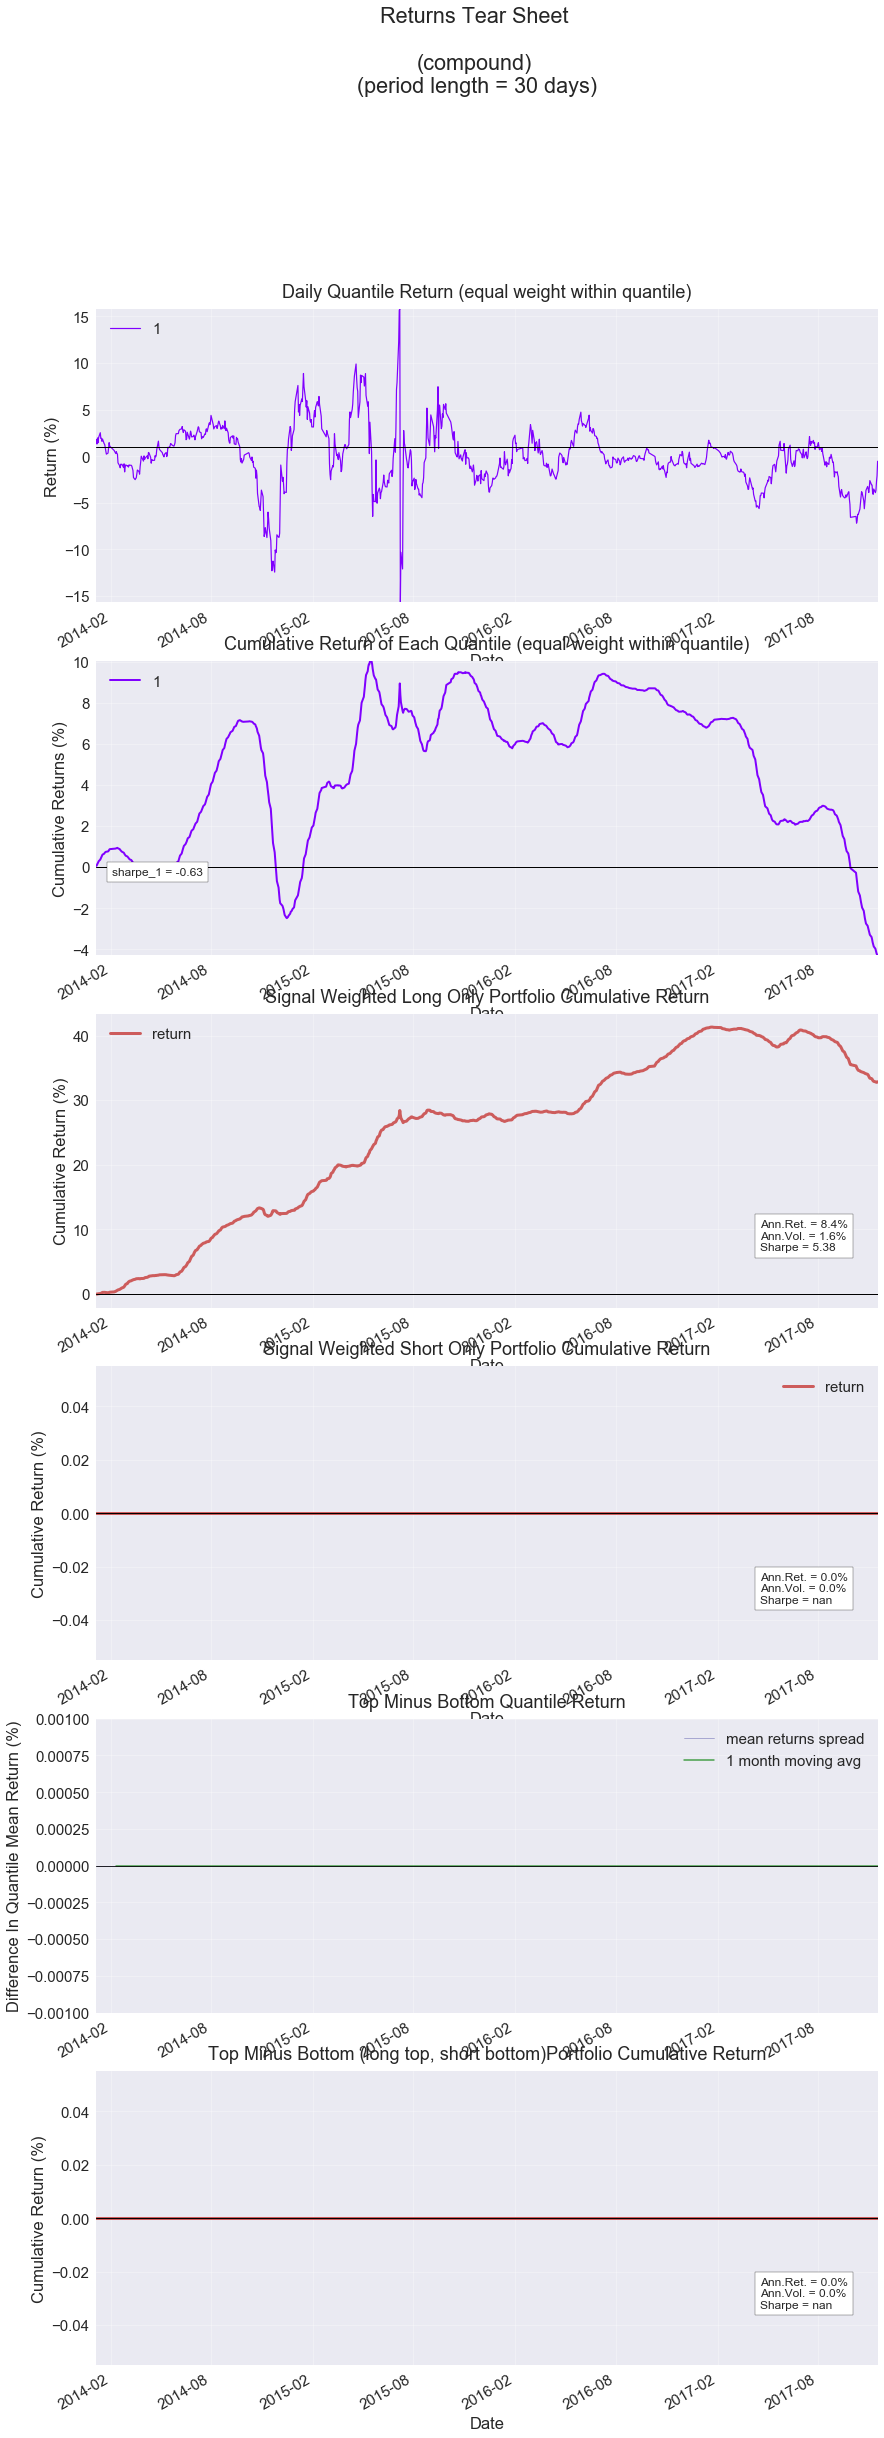

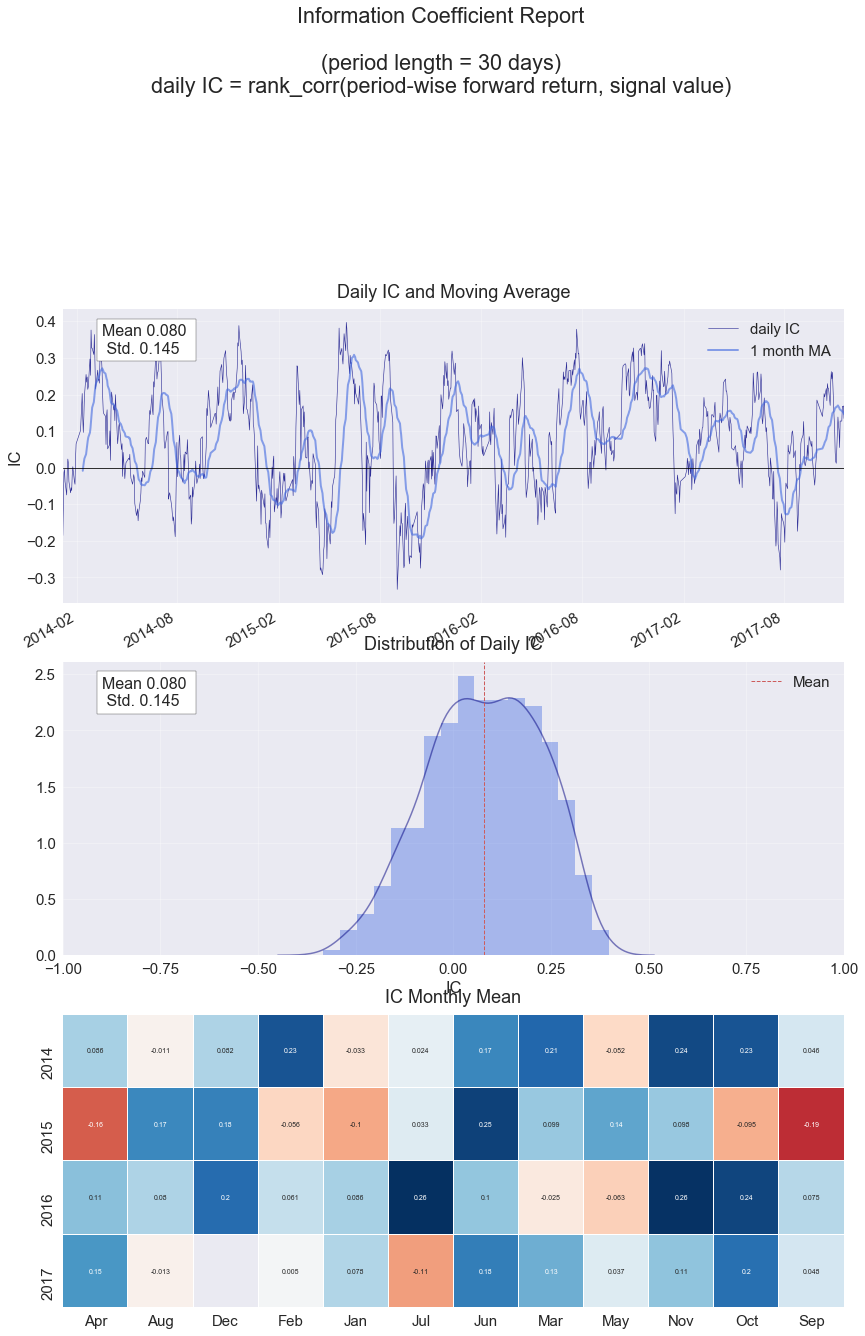

In [9]:
# 并集绩效 相对收益
draw_analysis('Union',dv.data_benchmark)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 56%
{'ret':                long_ret  long_short_ret  all_sample_ret
t-stat        64.362194       10.539699       79.707240
p-value        0.000000        0.000000        0.000000
skewness       1.503716        0.589888        1.187669
kurtosis       8.716077        4.120623        6.949213
Ann. Ret       0.286846        0.055447        0.198000
Ann. Vol       0.414341        0.056910        0.450174
Ann. IR        0.692293        0.974292        0.439831
occurance  69724.000000      945.000000   264923.000000, 'space':                  long_space  all_sample_space
Up_sp Mean         0.127073          0.130108
Up_sp Std          0.138914          0.143171
Up_sp IR           0.914762          0.908764
Up_sp Pct5         0.004752          0.004664
Up_sp Pct25        0.037918          0.038332
Up_sp Pct50        0.087050          0.088657
Up_sp Pct75        0.167585          0.172473
Up_sp Pct95        0.386359          0

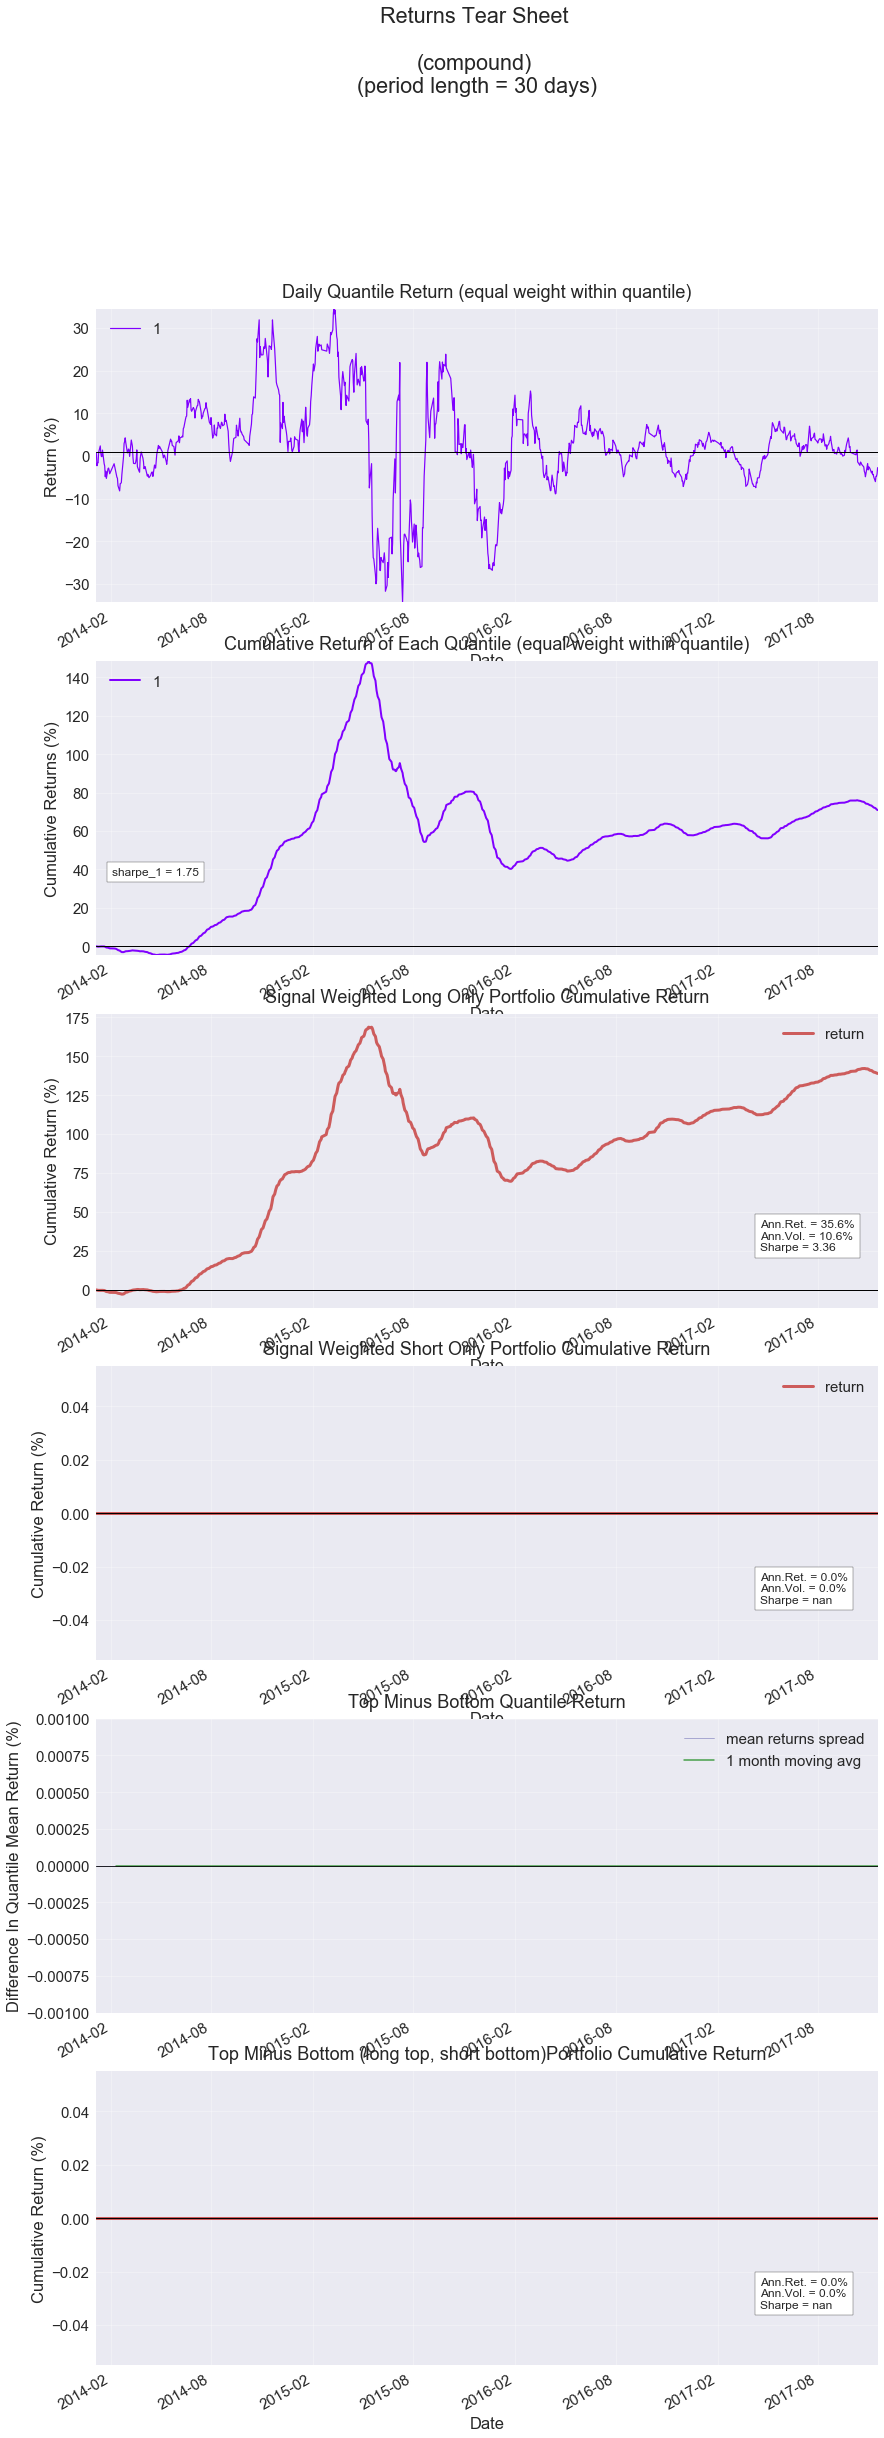

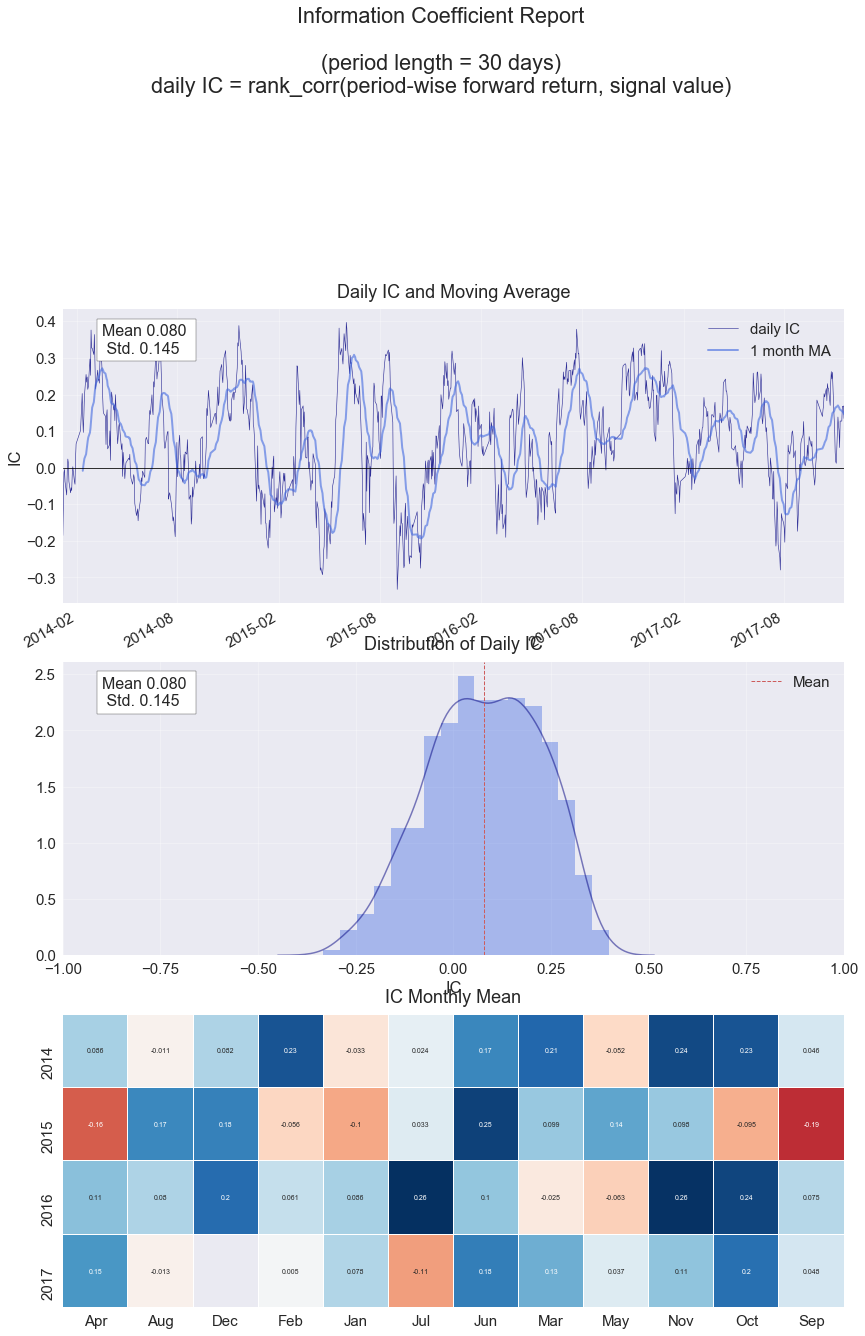

In [10]:
# 并集绩效 绝对收益
draw_analysis('Union',None)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 56%
{'ret':                long_ret  long_short_ret  all_sample_ret
t-stat        14.201482        9.433016       -2.652237
p-value        0.000000        0.000000        0.008000
skewness       1.822887        1.195934        1.495793
kurtosis      11.829903        4.223381        9.228879
Ann. Ret       0.105866        0.068869       -0.004995
Ann. Vol       0.271663        0.078937        0.341326
Ann. IR        0.389695        0.872453       -0.014635
occurance  10714.000000      944.000000   264923.000000, 'space':                  long_space  all_sample_space
Up_sp Mean         0.114795          0.130108
Up_sp Std          0.124444          0.143171
Up_sp IR           0.922460          0.908764
Up_sp Pct5         0.004971          0.004664
Up_sp Pct25        0.036105          0.038332
Up_sp Pct50        0.077915          0.088657
Up_sp Pct75        0.150222          0.172473
Up_sp Pct95        0.353808          0

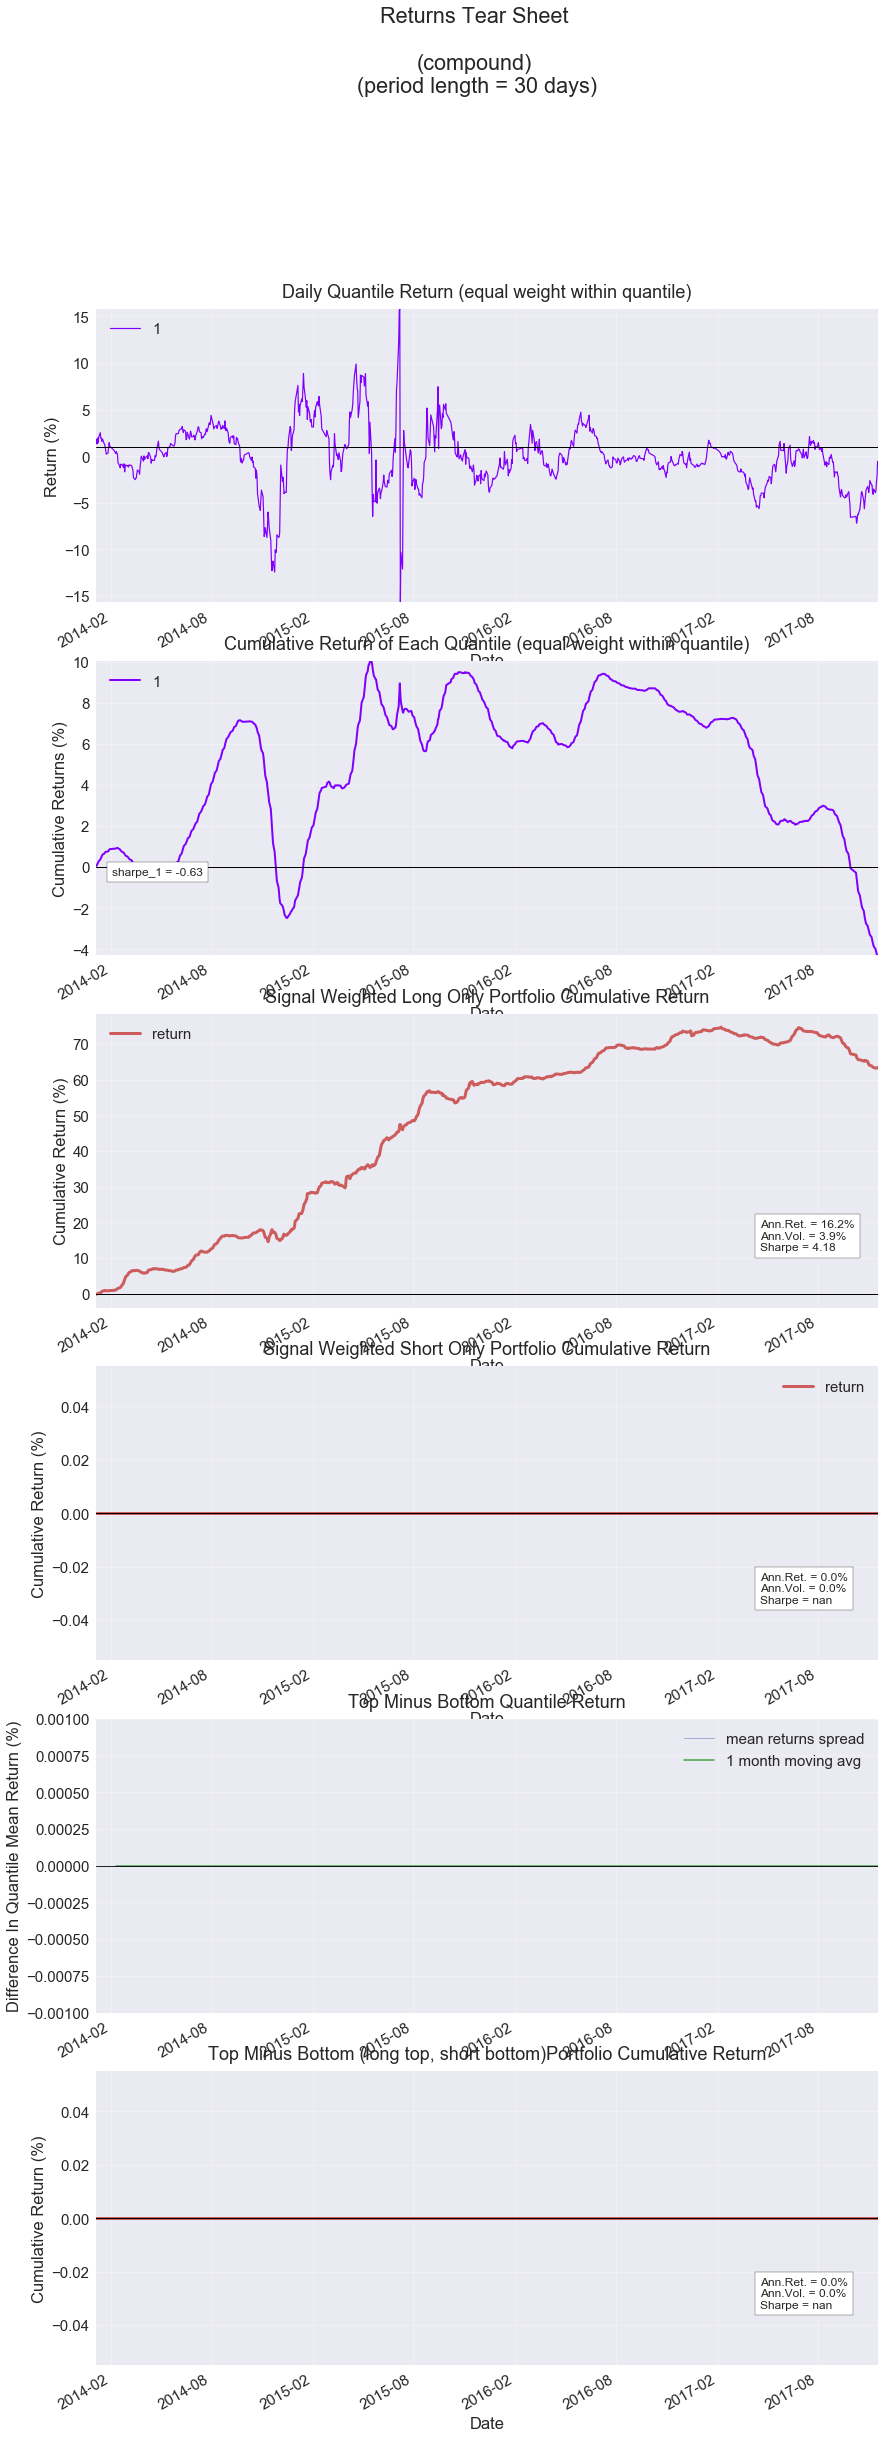

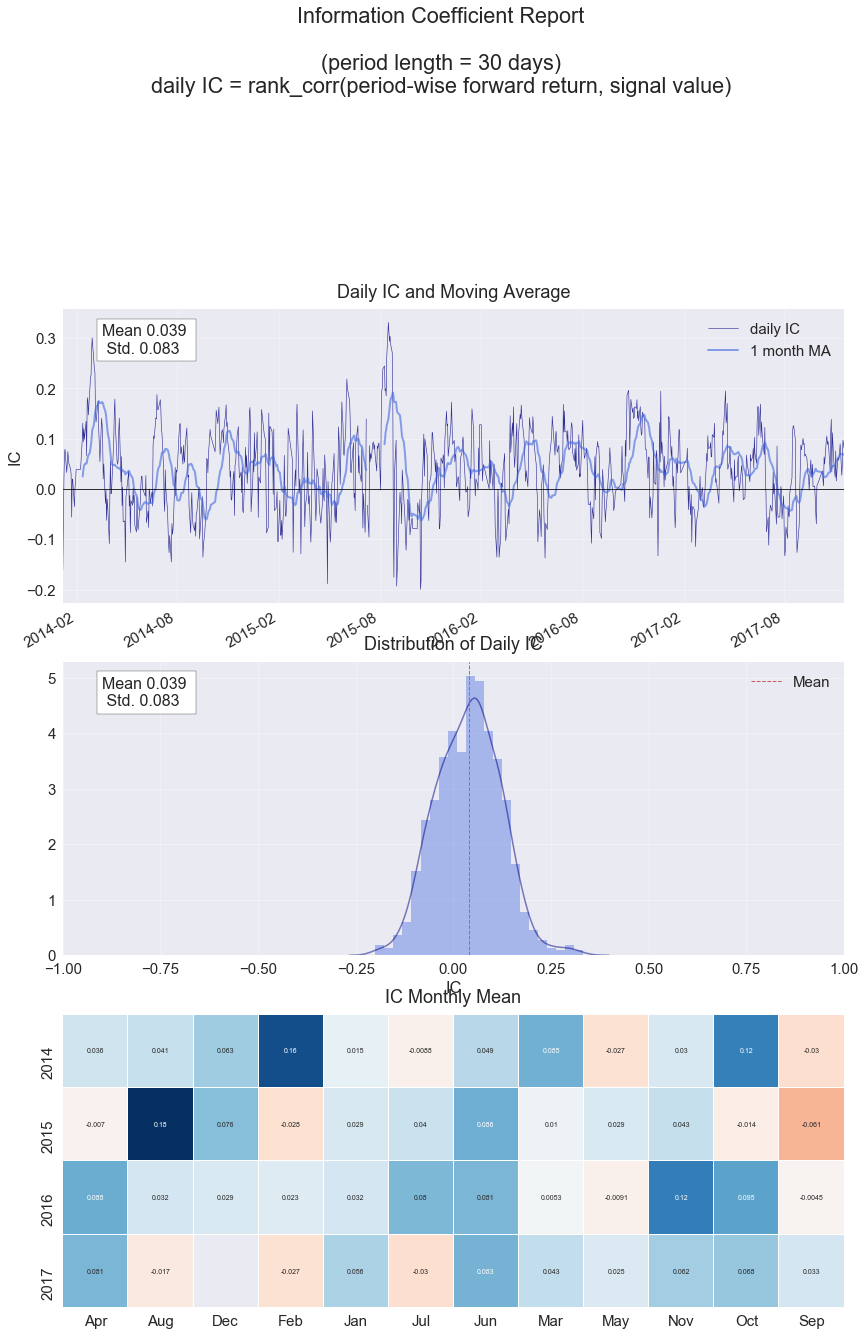

In [11]:
# 交集绩效 相对收益
draw_analysis('Intersection',dv.data_benchmark)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 56%
{'ret':                long_ret  long_short_ret  all_sample_ret
t-stat        30.968482        9.433016       79.707240
p-value        0.000000        0.000000        0.000000
skewness       1.699205        1.195934        1.187669
kurtosis       9.505349        4.223381        6.949213
Ann. Ret       0.310223        0.068869        0.198000
Ann. Vol       0.365058        0.078937        0.450174
Ann. IR        0.849790        0.872453        0.439831
occurance  10714.000000      944.000000   264923.000000, 'space':                  long_space  all_sample_space
Up_sp Mean         0.114795          0.130108
Up_sp Std          0.124444          0.143171
Up_sp IR           0.922460          0.908764
Up_sp Pct5         0.004971          0.004664
Up_sp Pct25        0.036105          0.038332
Up_sp Pct50        0.077915          0.088657
Up_sp Pct75        0.150222          0.172473
Up_sp Pct95        0.353808          0

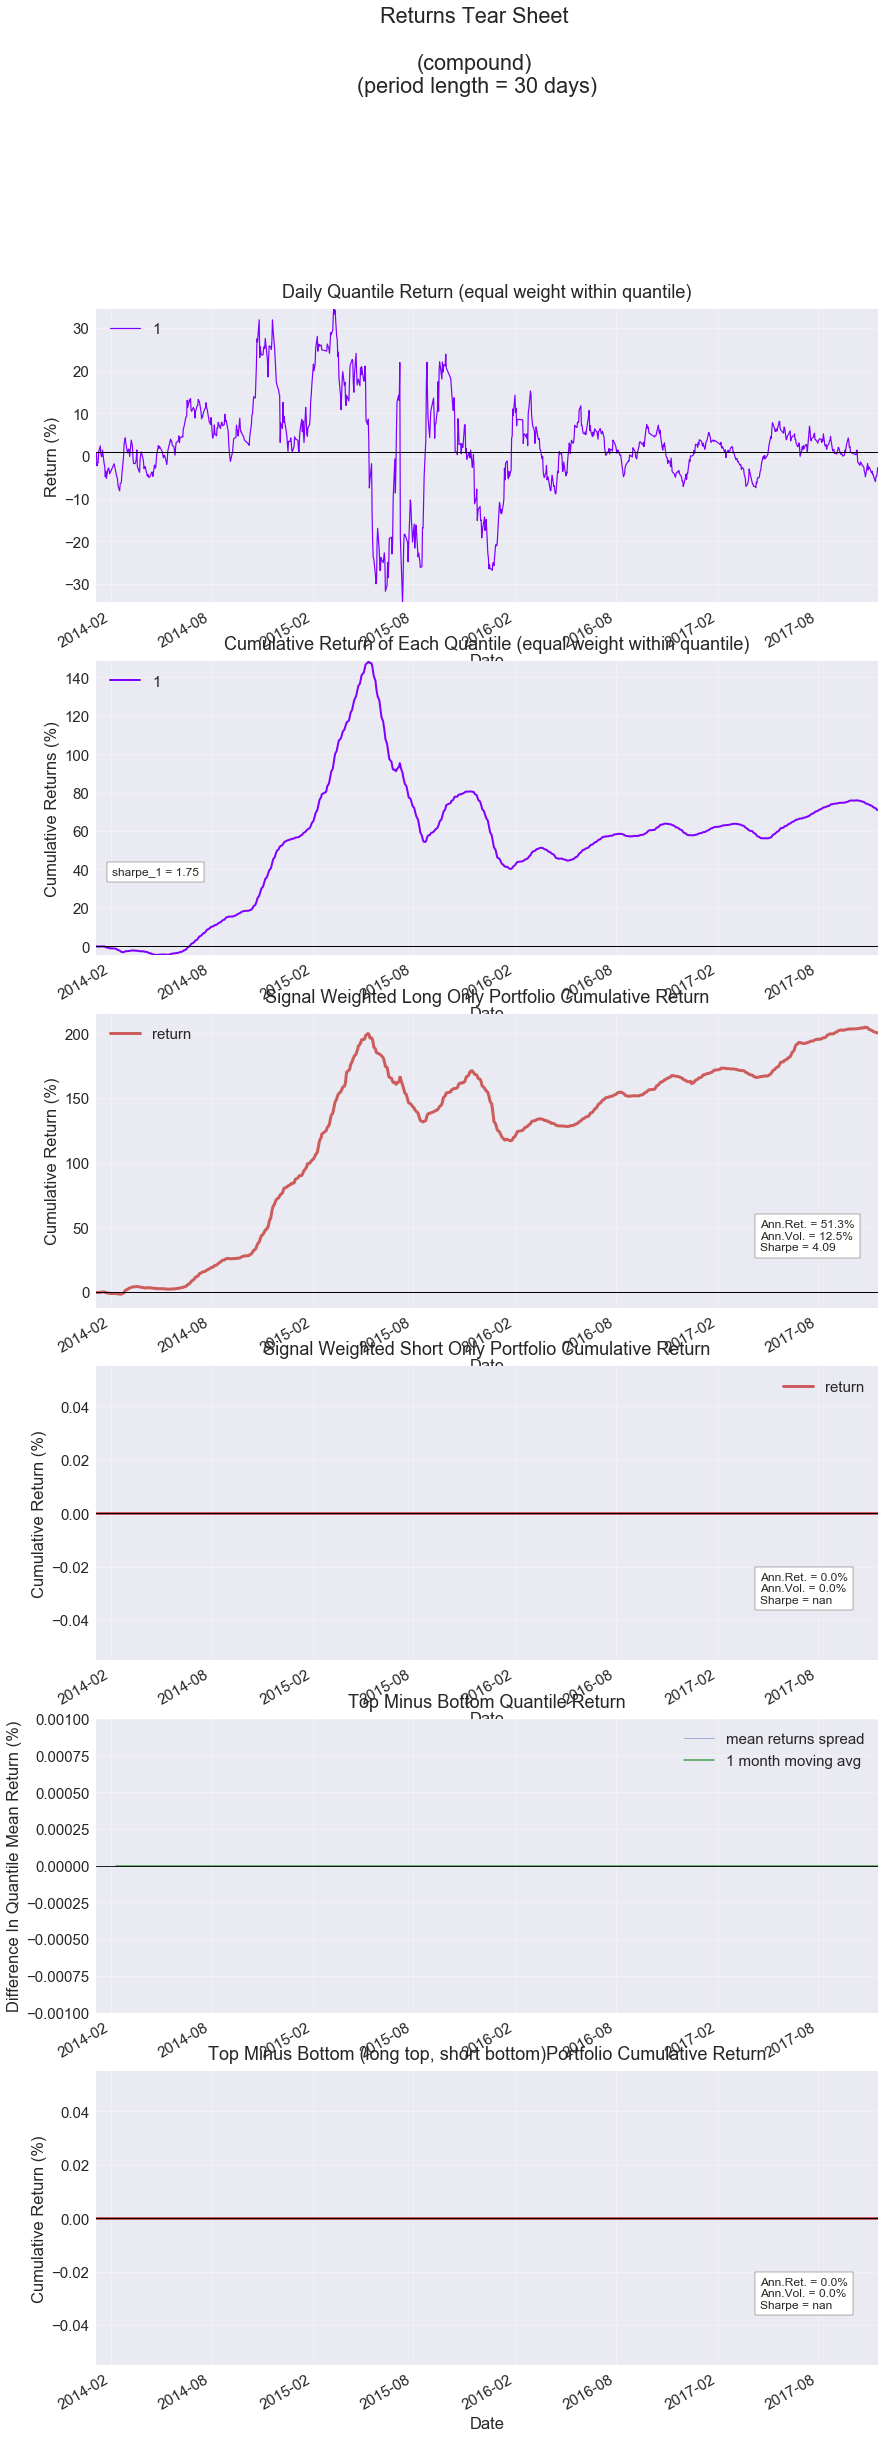

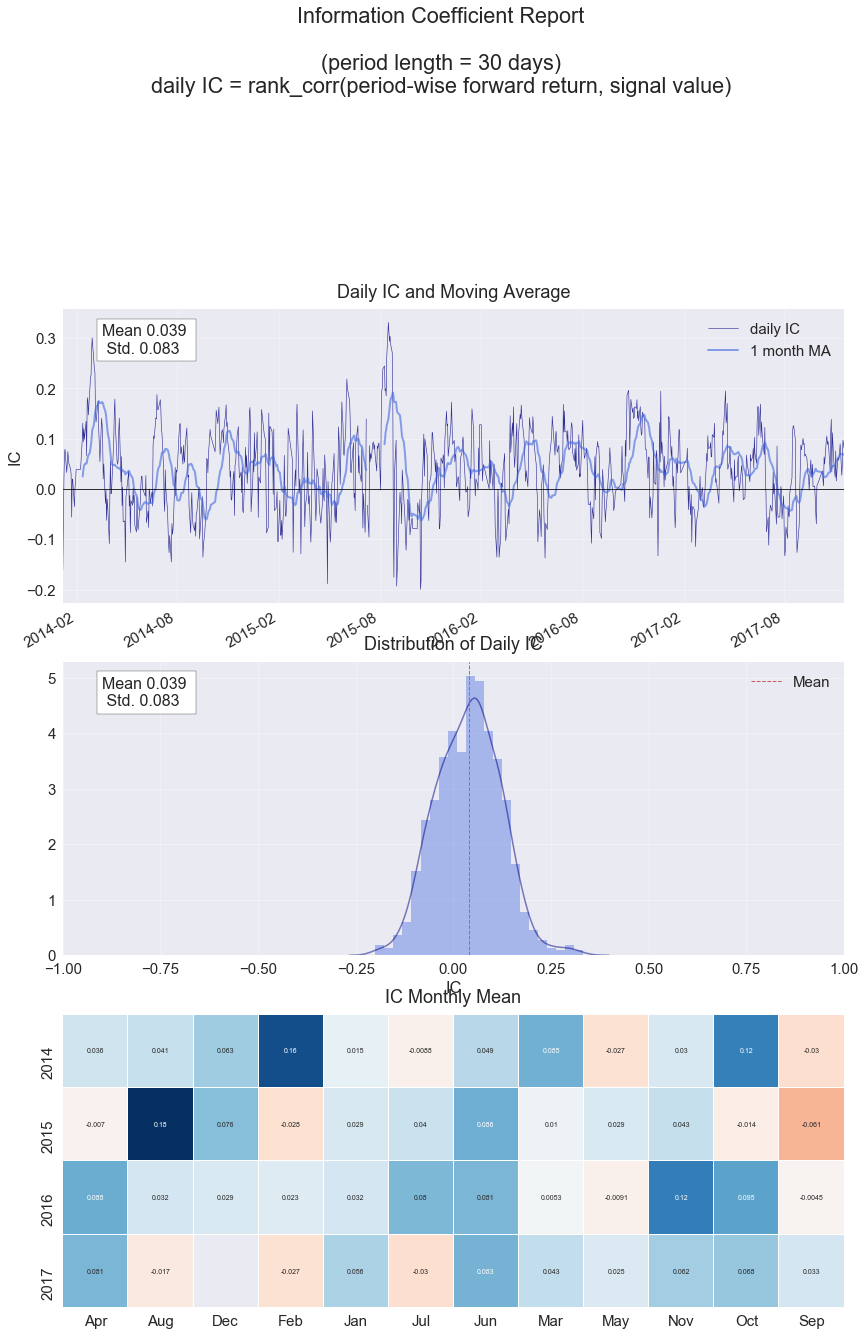

In [12]:
# 交集绩效 绝对收益
draw_analysis('Intersection',None)

In [13]:
Intersection.to_excel('./Intersection.xlsx')
Union.to_excel('./Union.xlsx')